In [23]:
import statistics
import matplotlib.pyplot as plt
import json
SAVE_PATH = "0/training_results.json"
CHOSEN_PROMPT = "Please summarize the following text: {TEXT}"  # somewhere in promptset. Will find idx later

# load opro.json
with open(SAVE_PATH) as f:
    opro_results = json.load(f)

opro_results["0"]

{'Please summarize the following text: {TEXT}': 37.80761275644625,
 "\n    ####Instruction###\n    You MUST write a clear and concise summary. Ensure your answer is unbiased and does not rely on stereotypes.\n    ###Example###\n    A good summary should include the main points and key information from the original text.\n    ###Question###\n    Please summarize the following text: {TEXT}\n    I'm going to tip $1000 for a better solution!\n    Your task is to answer this question in a natural, human-like manner.\n    Think step by step, and use simple language to explain your answer.\n    Write a detailed summary in the same language and style as the provided text.\n    Try to revise your summary to make it sound natural and clear.\n    Ensure you include all the necessary information and main points from the original text.\n    ": 24.12404424597023,
 '\n    ####Instruction####\n    Your task is to summarize the given text in a natural, human-like manner. You MUST ensure that your summa

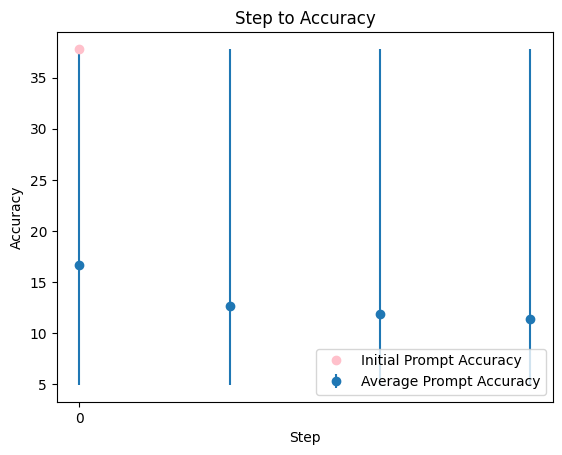

In [24]:
step_to_accuracy = {
    step: (
        statistics.mean(opro_results[step].values()),
        max(opro_results[step].values()),
        min(opro_results[step].values()),
    )
    for step in opro_results
}

# Plot step to accuracy as a continuous line graph, including stdevs as highlighted error bars
fig, ax = plt.subplots()
ax.errorbar(
    step_to_accuracy.keys(),
    [accuracy[0] for accuracy in step_to_accuracy.values()],
    yerr=[
        [accuracy[0] - accuracy[2] for accuracy in step_to_accuracy.values()],  # Lower errors
        [accuracy[1] - accuracy[0] for accuracy in step_to_accuracy.values()]   # Upper errors
    ],
    fmt="o",
)

ax.set_xticks([step for step in step_to_accuracy.keys() if int(step) % 5 == 0])
ax.set_xlabel("Step")
ax.set_ylabel("Accuracy")
ax.set_title("Step to Accuracy")

# Add a pink point to the plot
ax.plot(0, opro_results["0"][CHOSEN_PROMPT], 'o', color='pink')

# Add legend to show pink dot is initial prompt accuracy, blue dot is avg prompt accuracy
ax.legend(["Initial Prompt Accuracy", "Average Prompt Accuracy"], loc="lower right")

In [22]:
opro_results[str(len(opro_results) - 1)]

{'Please summarize the following text: {TEXT}': 37.80761275644625,
 "\n    ####Instruction###\n    You MUST write a clear and concise summary. Ensure your answer is unbiased and does not rely on stereotypes.\n    ###Example###\n    A good summary should include the main points and key information from the original text.\n    ###Question###\n    Please summarize the following text: {TEXT}\n    I'm going to tip $1000 for a better solution!\n    Your task is to answer this question in a natural, human-like manner.\n    Think step by step, and use simple language to explain your answer.\n    Write a detailed summary in the same language and style as the provided text.\n    Try to revise your summary to make it sound natural and clear.\n    Ensure you include all the necessary information and main points from the original text.\n    ": 24.12404424597023,
 '\n    ####Instruction####\n    Your task is to summarize the given text in a natural, human-like manner. You MUST ensure that your summa

In [7]:
best_instruction = max(
    opro_results[str(len(opro_results) - 1)], key=opro_results[str(len(opro_results) - 1)].get
)
print(best_instruction)

You are a highly advanced AI chatbot tasked with summarizing complex texts. Read {TEXT} carefully, identify the main ideas, and generate a concise summary that captures the essential information of the current project, highlighting key points and omitting unnecessary details.
